In [19]:
import math
import numpy as np
from graphviz import Digraph
import webbrowser
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:

'''
Derived from micrograd by Andrej Karpathy 
I will be taking notes on this as we go along
'''

def f(x):
    return 3*x**2 -4*x +5

class Value:
    """Object Value for nice operations"""
    def __init__(self, data, _children = (), _op ='', label = ""):
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data = {self.data})"
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out
    def __mul__(self, other):
        out = Value(self.data*other.data, (self, other), "*")
        return out
    
def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op , label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot




In [ ]:
# Show Visualization of Derivatives at x1
# x = np.arange(-5, 5, 0.25)
# plt.plot(x, f(x))
# plt.show()
# h = 0.0000001
# x1 = 3.0
# dfdx = (f(x1+h) - f(x1))/h
# print(dfdx) 
# a = 2.0
# b= -3.0
# c = 10.0
# d = a*b +c
# print(f"Value of the function d at the given values above - {d}") # 4

# h  = 0.000001
# d1 = a*b + c   # exact same function as d
# print(f"d1: {d1}") # 4 

# a += h # bump up the a <- by h  < -- You can also change the value of c or b to do some excercises

# d2 = a*b +c 
# print(f"d2: {d2}") # Let us unpack
# """
# So a <- 2 got bumped up slightly and b is a negative value of -3.0. Then, Whatever C is, it will be subtracting more of C.
# Thus d2 will be smaller than d1. Thus, derivative value will be negative.
# You might think you know derivative but think more!
# """
# print(f"How much did it change? : {d2- d1}") # -3e-5
# # Compute derivative as the definition 
# print(f"Derivative therefore is :  {(d2-d1)/h}") # -3 
"""Now Let us start building NN"""
# Create values
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
d = a*b+c 
print(d._prev) # Children nodes
print(d._op) # +

e = a*b
e.label = 'e'
d = e+c
d.label = 'd'

f  = Value(-2.0, label ='f')
L = d*f
L.label = "L" 



{Value(data = -6.0), Value(data = 10.0)}
+


"\nSo let's write it out.\nd = a*b +c\nand \n\nL = f*(a*b+c) = f*a*b + f*c\n"

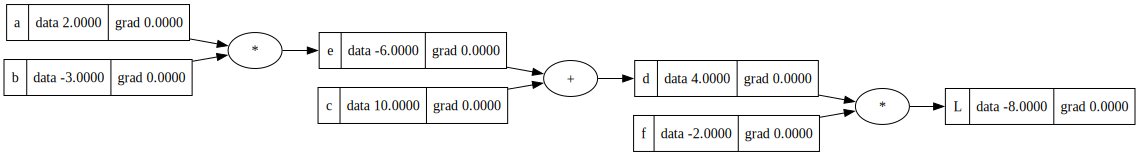

In [37]:
draw_dot(L)

In [44]:
L.grad = 1.0

In [45]:
def lol():
    h = 0.001


    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    d = a*b+c 
    print(d._prev) # Children nodes
    print(d._op) # +

    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd' 

    f  = Value(-2.0, label ='f')
    L = d*f
    L.label = "L" 

    L1 = L.data
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    d = a*b+c 
    print(d._prev) # Children nodes
    print(d._op) # +

    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'

    f  = Value(-2.0, label ='f')
    L = d*f
    L.label = "L" 
    L2 = L.data+h

    print((L2-L1)/h)

lol()
    

{Value(data = 10.0), Value(data = -6.0)}
+
{Value(data = 10.0), Value(data = -6.0)}
+
1.000000000000334


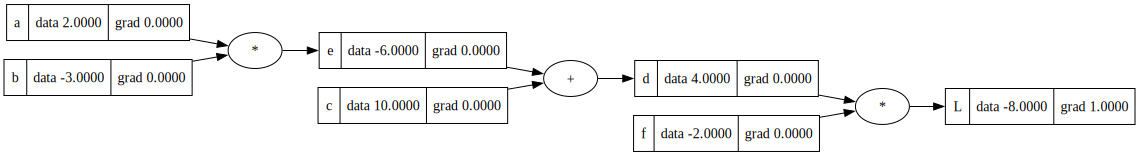

In [46]:
draw_dot(L)



So let's write it out.
d = a*b +c
and 

e = a*b

d = a*b+c
d = e+c

L = f*(a*b+c) = f*a*b + f*c

L can be written as then L = f*d

So using chain rule, we can simply do :      Rules of Calculus -> f(x) = g(x,h(x))   then we can write df/dx = dg/dx + df/dh * dh/dx

In this case, our function h is going to be d. So 
dL/dc = 0 (since we do not have explicit dependence)  + dL/dd* dd/dc = f*1
Then what is dL/dd?

dL/dd is in our case is just f.

dL/df is going to be d


In [48]:
f.grad = 4.0
d.grad = -2.0

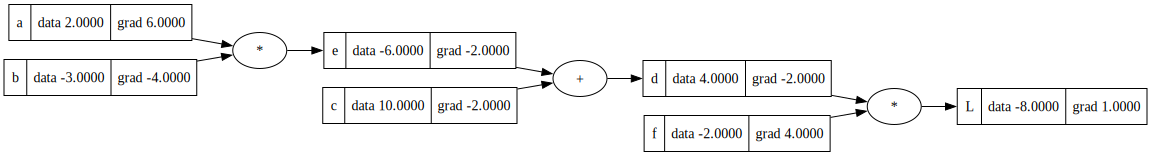

In [55]:
draw_dot(L)

Because we see that d = e+c, we know that we take the dd/de, we get 1.0 and by symmetry, we see that dd/dc is 1.0
And dL/dd is as we know, -2, we get that for addition nodes, we can simply copy over the gradients of the dL/dd


In [52]:
e.grad =  -2.0
c.grad = -2.0

We know that dL/de is -2. then we also know that dL/da by chain rule is going to be dL/de * de/da.

We know that de/da is b and de/db is a.
Then, we have -2*a and -2*b

This gives more insight. let's say that b is weights and a is data in neural networks.

So let's write it down again. 

dL/da = dL/dd*dd/de*de/da Ultimately recursively multiplying! is backprop basically

In [54]:
a.grad = 6
b.grad = -4